In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from subprocess import Popen, PIPE, call

In [2]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss/all_21nt/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

In [61]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/all_21/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

#MITEs
path_mites = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/all_filter_mite.gff3'
path_locifile = '/home/juan/Desktop/juan/bio/mrcv/data/genome/locifiles/mitesall.locifile.csv'


In [14]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/all_21/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

#MITEs
path_mites = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/all_filter_mite.gff3'
path_locifile = '/home/juan/Desktop/juan/bio/mrcv/data/genome/locifiles/mitesall.locifile.csv'


In [62]:
#make locifile
df_mites = pd.read_csv(path_mites, sep='\t')
df_mites.columns = ['id','seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
df_mites['locifile_position'] = df_mites.seqname + ':' + df_mites.start.astype(str) + '-' + df_mites.end.astype(str)
df_save = df_mites[['locifile_position','attribute']]
df_save.to_csv(path_locifile, header=None, index=None,sep='\t')

In [63]:
len(df_mites.index)

1222546

all_all clusters: 48876


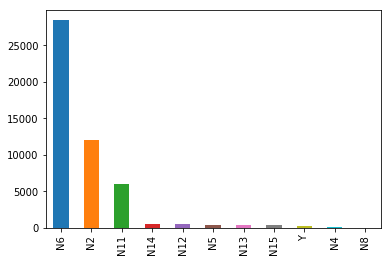

In [64]:
df_all_all = pd.read_csv(path_all_all + 'Results.txt', sep='\t')
print('all_all clusters: ' + str(len(df_all_all.index)))
df_all_all.MIRNA.value_counts().plot('bar')


In [65]:
df_all_all = df_all_all[df_all_all.MIRNA == 'Y']
print('all_all miRNA: ' + str(len(df_all_all.index)))


all_all miRNA: 162


all_21 clusters 33636


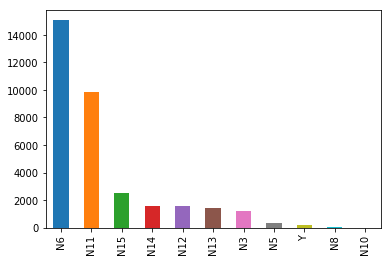

In [66]:
df_all_21 = pd.read_csv(path_all_21 + 'Results.txt', sep='\t')
df_all_21.MIRNA.value_counts().plot('bar')
print('all_21 clusters ' + str(len(df_all_21.index)))

In [67]:
df_all_21 = df_all_21[df_all_21.MIRNA == 'Y']
print('all_21 miRNA: ' + str(len(df_all_21.index)))

all_21 miRNA: 220


MITEs all clusters: 1203406


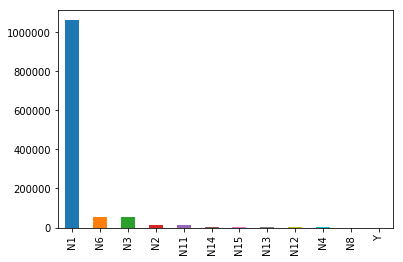

In [68]:
df_mite_all = pd.read_csv(path_mite_all + 'Results.txt', sep='\t')
df_mite_all.MIRNA.value_counts().plot('bar')
print('MITEs all clusters: ' + str(len(df_mite_all.index)))

In [69]:
df_mite_all = df_mite_all[df_mite_all.MIRNA == 'Y']
print('MITEs all miRNA: ' + str(len(df_mite_all.index)))
df_mite_all.to_csv(path_mite_all + 'Results.valid.csv', sep='\t', index=None)

MITEs all miRNA: 50


MITEs 21 clusters: 1203406


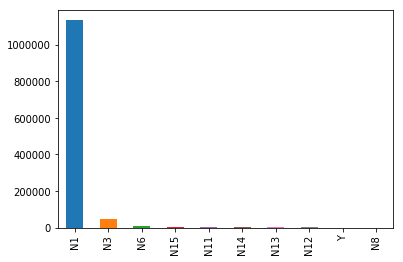

In [70]:
df_mite_21 = pd.read_csv(path_mite_21 + 'Results.txt', sep='\t')
df_mite_21.MIRNA.value_counts().plot('bar')
print('MITEs 21 clusters: ' + str(len(df_mite_21.index)))

In [71]:
df_mite_21 = df_mite_21[df_mite_21.MIRNA == 'Y']
print('MITEs 21 miRNA: ' + str(len(df_mite_21.index)))

MITEs 21 miRNA: 99


In [72]:
#counts
df_mite_21_counts = pd.read_csv(path_mite_21 + 'Counts.txt', sep='\t')
print('Counts: ' + str(len(df_mite_21_counts.index)))

Counts: 1203406


In [73]:
mites = df_mite_21['#Locus'].tolist()
df_mite_21_counts = df_mite_21_counts[df_mite_21_counts['Locus'].isin(mites)]

In [74]:
print('Counts valid: ' + str(len(df_mite_21_counts.index)))

Counts valid: 99


In [75]:
df_mite_21_counts.to_csv(path_mite_21 + 'counts.valid.csv',sep='\t',index=None)

In [25]:
#all miRNA and MITEs

In [26]:
yeses = 0
stuff = []
total = 0
for k, v in df_all_all.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_all.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
'all ' + str(yeses * 100 / total)

'all 8.641975308641975'

In [27]:
#21nt miRNA and MITEs

In [28]:
yeses = 0
stuff = []
total = 0
for k, v in df_all_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_21.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

0.9049773755656109

In [29]:
#reverse

In [30]:
yeses = 0
stuff = []
total = 0
for k, v in df_mite_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_all_21.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

54.54545454545455

In [31]:
#21 pero no en all mites

In [32]:
yeses = 0
stuff = []
total = 0
for k, v in df_mite_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_all.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

63.63636363636363

In [33]:
#mirBASE with 21

In [34]:
records = []
for k,v in df_mite_21.iterrows():
    record = SeqRecord(Seq(v.MajorRNA), id=v['#Locus'], description=v['Name'])
    records.append(record)
SeqIO.write(records, path_mite_21_seqs, 'fasta')
path_mite_21_seqs

'/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.fasta'

#blast
blastn -task blastn -query /home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/mir.Y.fasta -subject /home/juan/Desktop/juan/bio/mrcv/data/mature.fa -outfmt "6 qseqid sseqid qstart qend sstart send mismatch gaps pident evalue length qlen slen qcovs" > /home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/mir.Y.mirbase.csv

In [35]:
df_mirbase = pd.read_csv(path_mirbase, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)

2274


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs
0,1A:169645857-169646029,rno-miR-3587,5,16,7,18,0,0,100.0,0.26,12,21,21,57
1,1A:169645857-169646029,rno-miR-3556b,5,16,4,15,0,0,100.0,0.26,12,21,20,57


In [36]:
df_mirbase = df_mirbase[df_mirbase.length >= df_mirbase.qlen - 2]
print('lenght >= (length -2) ' + str(len(df_mirbase.index)))

lenght >= (length -2) 34


In [37]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= 2]
print('gaps <= 2 ' + str(len(df_mirbase.index)))

gaps <= 2 34


In [38]:
print('MITEs with miRBASE results ' + str(len(df_mirbase.qseqid.unique().tolist())))

MITEs with miRBASE results 22


In [39]:
df_mirbase_s = df_mirbase.groupby('qseqid')#['sseqid'].apply(lambda x: "%s" % ', '.join(x))

In [40]:
df_mirbase_s

In [41]:
#add miRBASE annotation to df_mite_21

In [42]:
df_mite_21['miRBASE'] = ''
for k_mite, v_mite in df_mite_21.iterrows():
    for name, group in df_mirbase_s:
        if v_mite['#Locus'] == name:
            df_mite_21.at[k_mite, 'miRBASE'] += ','.join(group.sseqid.tolist()) + '.'

In [43]:
#genomic annotation

In [44]:
df_ann = pd.read_csv(file_ann, index_col=False, sep='\t', comment='#', header=None)
df_ann.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('all features: ' + str(len(df_ann.index)))

all features: 2573211


In [45]:
df_ann = df_ann[
    (df_ann.feature == 'intron') | 
    (df_ann.feature == 'exon') | 
    (df_ann.feature == 'three_prime_UTR') | 
    (df_ann.feature == 'five_prime_UTR')]
print('gene-related features: ' + str(len(df_ann.index)))

gene-related features: 1593666


In [46]:
df_ann_promoters = pd.read_csv(file_ann_promoters, index_col=False, sep='\t', comment='#', header=None)
df_ann_promoters.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('promoters: ' + str(len(df_ann_promoters.index)))

promoters: 120744


In [47]:
df_ann_total = pd.concat([df_ann, df_ann_promoters])
print('total: ' + str(len(df_ann_total.index)))

total: 1714410


In [48]:
df_mite_21.head(3)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,miRBASE
15515,1A:169645857-169646029,MITE_T_62663|chr6B|624472362|624472543|TTTAAA|...,173,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,Y,-1.0,0,0,0,9,0,0,0,
15516,1A:169645864-169646038,MITE_T_58158|chr2D|446317622|446317827|AT|219|...,175,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,Y,-1.0,0,0,0,9,0,0,0,
15517,1A:169645881-169646012,MITE_T_83087|chr3D|7232862|7232993|TA|139|F3602,132,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,Y,-1.0,0,0,0,9,0,0,0,


In [49]:
df_mite_21['seqname'] = df_mite_21['#Locus'].str.split(':').str[0]
df_mite_21['start'] = df_mite_21['#Locus'].str.split(':').str[1].str.split('-').str[0]
df_mite_21['end'] = df_mite_21['#Locus'].str.split(':').str[1].str.split('-').str[1]
df_mite_21['feature'] = 'intergenic'
df_mite_21['gene'] = ''
for k_mite, v_mite in df_mite_21.iterrows():
    cur = df_ann_total[df_ann_total.seqname == v_mite.seqname]
    for k_feature,v_feature in cur.iterrows():
        start = int(v_feature.start)
        end = int(v_feature.end)
        #overlaps with gene
        if int(v_mite.end) >= start and int(v_mite.start) <= end:
            #I dont want to replace 'UTRs with exon
            if v_feature.feature != 'three_prime_UTR' and  v_feature.feature != 'five_prime_UTR':
                df_mite_21.at[k_mite, 'feature'] = v_feature.feature
                df_mite_21.at[k_mite, 'gene'] = v_feature.attribute
                #print (k_mite,v_mite.Name, v_feature.feature,v_feature.attribute)
print(len(df_mite_21.index))
df_mite_21.feature.value_counts().plot('bar')

KeyboardInterrupt: 

In [ ]:
df_all_21['seqname'] = df_all_21['#Locus'].str.split(':').str[0]
df_all_21['start'] = df_all_21['#Locus'].str.split(':').str[1].str.split('-').str[0]
df_all_21['end'] = df_all_21['#Locus'].str.split(':').str[1].str.split('-').str[1]
df_all_21['feature'] = 'intergenic'
df_all_21['gene'] = ''
for k_mite, v_mite in df_all_21.iterrows():
    cur = df_ann_total[df_ann_total.seqname == v_mite.seqname]
    for k_feature,v_feature in cur.iterrows():
        start = int(v_feature.start)
        end = int(v_feature.end)
        #overlaps with gene
        if int(v_mite.end) >= start and int(v_mite.start) <= end:
            #I dont want to replace 'UTRs with exon
            if v_feature.feature != 'three_prime_UTR' and  v_feature.feature != 'five_prime_UTR':
                df_all_21.at[k_mite, 'feature'] = v_feature.feature
                df_all_21.at[k_mite, 'gene'] = v_feature.attribute
print(len(df_all_21.index))
df_all_21.feature.value_counts().plot('bar')

In [ ]:
df_mite_21.to_csv(path_mite_21 + 'annotated.csv', sep='\t', index=None)

In [ ]:
df_mite_21['seqname_chr'] = df_mite_21.seqname.str[0]
df_mite_21['seqname_genome'] = df_mite_21.seqname.str[1]

In [ ]:
df_mite_21.head()